<h3><u><center> Defining Problem Statement </center></u></h3>
<ul>
    <li> LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.</li>
    <li> The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals. </li>
<li> Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations? </li> 
</ul>

<b><u> Notes: </u></b>
<ol>
    <li> loan_status : Current status of the loan - Binary value -Target Variable </li>
</ol>

In [287]:
import numpy as np
import pandas as pd
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

<h3><u><center> Data Definition </center></u></h3>

In [288]:
org_data = pd.read_csv("loantap.csv")
org_data.head(8)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723


In [289]:
org_data.shape

(396030, 27)

In [290]:
org_data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [291]:
org_data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [292]:
org_data.describe(include = "object").T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [293]:
org_data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [294]:
org_data[org_data.duplicated() == True].count()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [295]:
def value_cnts(df, cols):
    threshold = 14 # will only consider top "n" unique values if unique values in a column exceeds threshold value
    print("--------------XXX-------------")
    print("Value counts of discrete Data")
    print("--------------XXX-------------")
    for column in cols:
        
        if(df[column].nunique() <= threshold):
            print(f"{column} :\nUnique Values: {df[column].unique()},\nUnique Value Counts: {df[column].nunique()},\n% of total: \n{df[column].value_counts(dropna = False, normalize = True)*100}")
            print("--------------XXX-------------", end = "")
            print()
        
        else:
            print(f"{column} :\nUnique Values: {df[column].nunique()},\nValue counts of Top-{threshold} unique values :,\n% of total: \n{df[column].value_counts(dropna = False, normalize = True).head(threshold)*100}")
            print("--------------XXX-------------", end = "")
            print()

In [296]:
discrete_cols = org_data.columns[org_data.dtypes == "object"].tolist()
value_cnts(org_data, discrete_cols)

--------------XXX-------------
Value counts of discrete Data
--------------XXX-------------
term :
Unique Values: [' 36 months' ' 60 months'],
Unique Value Counts: 2,
% of total: 
 36 months    76.258112
 60 months    23.741888
Name: term, dtype: float64
--------------XXX-------------
grade :
Unique Values: ['B' 'A' 'C' 'E' 'D' 'F' 'G'],
Unique Value Counts: 7,
% of total: 
B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: grade, dtype: float64
--------------XXX-------------
sub_grade :
Unique Values: 35,
Value counts of Top-14 unique values :,
% of total: 
B3    6.730551
B4    6.464409
C1    5.974800
C2    5.701588
B2    5.680125
B5    5.576598
C3    5.358432
C4    5.120824
B1    4.843572
A5    4.677928
C5    4.606722
D1    4.038330
A4    3.986819
D2    3.522713
Name: sub_grade, dtype: float64
--------------XXX-------------
emp_title :
Unique Values: 173105,
Value counts of Top-14 unique values :,
% of total: 
NaN           

<h3><u><center> Initial Feature Engineering Steps </center></u></h3>

In [297]:
org_data["address"].value_counts().head(10)

USCGC Smith\r\nFPO AE 70466     8
USS Johnson\r\nFPO AE 48052     8
USNS Johnson\r\nFPO AE 05113    8
USS Smith\r\nFPO AP 70466       8
USNS Johnson\r\nFPO AP 48052    7
USNV Smith\r\nFPO AA 00813      6
USCGC Smith\r\nFPO AA 70466     6
USCGC Jones\r\nFPO AE 22690     6
USNS Johnson\r\nFPO AA 70466    6
USNV Smith\r\nFPO AE 30723      6
Name: address, dtype: int64

In [298]:
#Creating copy of original data to preserve it for later
data = org_data.copy()

# Extracting pincode from address column -- We observe while doing value_counts that pincodes are repeating multiple times
data['pincode'] = data['address'].str.split(" ").str[-1].astype('int64')
data['state'] = data['address'].str.split(" ").str[-2]

# Converting term column to integer
data['term'] = data['term'].str.split(" ").str[1].astype('int64')

# Converting loan_status column to numeric and re-ordering columns to make loan_status as last column
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
data.insert(len(data.columns) - 1, 'loan_status', data.pop('loan_status'))

# Flag creation for Pub_rec, Mort_acc, Pub_rec_bankruptcies. If value greater than 1.0 then 1 else 0
flag_cols = ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
for col in flag_cols:
    data[col] = data[col].apply(lambda x: 1 if x>1 else 0)

# Dropping columns:
# Issue_date, earliest_cr_line as they are dates (irrelevant) and have mutliple values which will cause curse of dimentionality
# title as it is duplicate of purpose
data.drop(columns = ["issue_d", "title", "earliest_cr_line", "address"], inplace = True)
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode,state,loan_status
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,22690,OK,1
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,5113,SD,1
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,5113,WV,1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,813,MA,1
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,11650,VA,0


**APP, AE, AA represents armed forces** : https://kb.blackbaud.com/knowledgebase/Article/49137

In [299]:
vc = data['state'].value_counts(normalize = True).reset_index().rename(columns={'index':'State', 'state':'% of total'})
vc["% of total"] = np.round(vc["% of total"], 3) * 100
print("Shape:", vc.shape)
vc.head(5)

Shape: (54, 2)


,State,% of total
0,AP,3.6
1,AE,3.6
2,AA,3.5
3,NJ,1.8
4,WI,1.8


In [300]:
vc = data['pincode'].value_counts(normalize = True).reset_index().rename(columns={'index':'Pincode', 'pincode':'% of total'})
vc["% of total"] = np.round(vc["% of total"], 3) * 100
vc

,Pincode,% of total
0,70466,14.4
1,30723,14.3
2,22690,14.3
3,48052,14.1
4,813,11.6
5,29597,11.5
6,5113,11.5
7,11650,2.8
8,93700,2.8
9,86630,2.8


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  int64  
 15  

<h3><u> Missing Value Treatment</u></h3>

In [302]:
(data.isna().sum()[data.isna().sum() > 0]*100/len(data)).reset_index().rename(columns={'index':'Cols', 0:'% of total'})

,Cols,% of total
0,emp_title,5.789208
1,emp_length,4.621115
2,revol_util,0.069692


In [303]:
data[['revol_util']].describe()

,revol_util
count,395754.000000
mean,53.791749
std,24.452193
min,0.000000
25%,35.800000
50%,54.800000
75%,72.900000
max,892.300000


In [304]:
# filling revol_util with mean as number of null values are extremely low so wouldn't impact predicition much
data['revol_util'].fillna(np.mean(data['revol_util']), inplace = True)

# imputing employment length with mode since num of categories are quite less
data['emp_length'].fillna(data['emp_length'].mode()[0], inplace = True)

# There are a lot of categories in profession and missing values represent a % much higher than the highest category
# So its better to create a completely new category for these people. They might even be unemployed, but we aren't sure
data['emp_title'].fillna("Unknown Profession", inplace = True)

data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

<h3><u> Outlier Detection</u></h3>

In [305]:
#IQR Method
def df_printoutl(df, numeric_cols = None):
    
    if(numeric_cols is None):
        numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
        
    print("--------------------XXX---------------------")
    print("\t\tOutlier Counts")
    print("--------------------XXX---------------------")
    
    for col in numeric_cols:
        count_outliers = 0
        q1 = np.quantile(df[col], 0.25)
        q2 = np.quantile(df[col], 0.50)
        q3 = np.quantile(df[col], 0.75)
        IQR = q3 - q1
        min_outlier = q1 - 1.5*(IQR)
        max_outlier = q3 + 1.5*(IQR)
        
        min_outl_count = df[col][(df[col] <= min_outlier)].count()
        max_outl_count = df[col][(df[col] >= max_outlier)].count()
        total_outliers = df[col][(df[col] >= max_outlier) | (df[col] <= min_outlier)].count()
        
        print(f"{col}: {total_outliers} ({np.round(total_outliers/len(df), 4)}% of total)")
        if(min_outl_count == 0 and max_outl_count > 0):
            print(f"Outlier range: >= {np.round(max_outlier, 3)}")
            print("--------------------XXX---------------------")
        elif(max_outl_count == 0 and min_outl_count > 0):
            print(f"Outlier range: <= {np.round(min_outlier, 3)}")
            print("--------------------XXX---------------------")
        else:
            print(f"Outlier range: <= {np.round(min_outlier, 3)} and >= {np.round(max_outlier, 3)}")
            print("--------------------XXX---------------------")

In [306]:
df_printoutl(data)

--------------------XXX---------------------
		Outlier Counts
--------------------XXX---------------------
loan_amnt: 194 (0.0005% of total)
Outlier range: >= 38000.0
--------------------XXX---------------------
term: 396030 (1.0% of total)
Outlier range: <= 36.0 and >= 36.0
--------------------XXX---------------------
int_rate: 3777 (0.0095% of total)
Outlier range: >= 25.49
--------------------XXX---------------------
installment: 11250 (0.0284% of total)
Outlier range: >= 1042.755
--------------------XXX---------------------
annual_inc: 16714 (0.0422% of total)
Outlier range: >= 157500.0
--------------------XXX---------------------
dti: 275 (0.0007% of total)
Outlier range: >= 40.53
--------------------XXX---------------------
open_acc: 13251 (0.0335% of total)
Outlier range: >= 23.0
--------------------XXX---------------------
pub_rec: 396030 (1.0% of total)
Outlier range: <= 0.0 and >= 0.0
--------------------XXX---------------------
revol_bal: 21259 (0.0537% of total)
Outlier ran

In [307]:
# continuos_cols = org_data.columns[~org_data.columns.isin(discrete_cols)].tolist()
continuos_cols = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc']
df_printoutl(data, continuos_cols)

--------------------XXX---------------------
		Outlier Counts
--------------------XXX---------------------
loan_amnt: 194 (0.0005% of total)
Outlier range: >= 38000.0
--------------------XXX---------------------
int_rate: 3777 (0.0095% of total)
Outlier range: >= 25.49
--------------------XXX---------------------
installment: 11250 (0.0284% of total)
Outlier range: >= 1042.755
--------------------XXX---------------------
annual_inc: 16714 (0.0422% of total)
Outlier range: >= 157500.0
--------------------XXX---------------------
dti: 275 (0.0007% of total)
Outlier range: >= 40.53
--------------------XXX---------------------
open_acc: 13251 (0.0335% of total)
Outlier range: >= 23.0
--------------------XXX---------------------
revol_bal: 21259 (0.0537% of total)
Outlier range: >= 40012.5
--------------------XXX---------------------
revol_util: 12 (0.0% of total)
Outlier range: >= 128.4
--------------------XXX---------------------
total_acc: 8499 (0.0215% of total)
Outlier range: >= 54.5
-

In [308]:
data.annual_inc.describe()/100

count     3960.300000
mean       742.031758
std        616.376212
min          0.000000
25%        450.000000
50%        640.000000
75%        900.000000
max      87065.820000
Name: annual_inc, dtype: float64

In [310]:
def cap_outlier(df, cols_to_cap):
    thresh = 0.997 # 3 Sigma
    
    for col in cols_to_cap:
        q = np.quantile(df[col], thresh)
        updates = df[col][df[col] > q].count()
        df.loc[df[col] > q, col] = q
        print(f"Capped {updates} values in {col} with limit {q}")

In [311]:
cols_to_cap = ["annual_inc", "dti", "open_acc", "revol_bal", "revol_util", "total_acc"]
cap_outlier(data, cols_to_cap)

Capped 1145 values in annual_inc with limit 350000.0
Capped 1180 values in dti with limit 38.95
Capped 1000 values in open_acc with limit 33.0
Capped 1189 values in revol_bal with limit 152010.82300000003
Capped 1167 values in revol_util with limit 100.0
Capped 1131 values in total_acc with limit 67.0


In [312]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.000
term,396030.0,41.698053,10.212038,36.00,36.00,36.00,36.00,60.000
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.990
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.810
annual_inc,396030.0,73449.693854,43328.710265,0.00,45000.00,64000.00,90000.00,350000.000
dti,396030.0,17.342061,8.108238,0.00,11.28,16.91,22.98,38.950
open_acc,396030.0,11.298346,5.070883,0.00,8.00,10.00,14.00,33.000
pub_rec,396030.0,0.020248,0.140849,0.00,0.00,0.00,0.00,1.000
revol_bal,396030.0,15556.759565,16503.799126,0.00,6025.00,11181.00,19620.00,152010.823
revol_util,396030.0,53.780573,24.387575,0.00,35.90,54.80,72.90,100.000


In [313]:
data.describe(include = 'object').T

,count,unique,top,freq
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,396030,173106,Unknown Profession,22927
emp_length,396030,11,10+ years,144342
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
purpose,396030,14,debt_consolidation,234507
initial_list_status,396030,2,f,238066
application_type,396030,3,INDIVIDUAL,395319
state,396030,54,AP,14308


<h3><u>Summary</u></h3>
<ol>
    <li> <b>Observation:</b> Data has 396030 entries, 25 columns (after initial feature engg). Data had very few null values and they were imputed without losing any data</li>
    <li> <b>Observation:</b> The column address was extremely granular and has multiple repetitions <br><b>Fix:</b> Divided the address field into state and pincode to bring about some homogenity in the data. This will help us check if location is a factor in deciding the loan status</li>
    <li> <b>Observation:</b> Columns such as Pub_rec, Mort_acc, Pub_rec_bankruptcies are considered negative for a person's creditworthiness. Having more of these can raise concerns for lenders.<br><b>Fix:</b> Created flags </li>
    <li> <b>Observation:</b> Our target value (loan status) has significant class imbalance, this will create issues in prediction.<br><b>Fix:</b> We can under techniques like undersampling, oversampling and smote to reduce this </li>
    <li> <b>Observation:</b> Some features such as grade, verification status, initial list status have an approx. even distribution; Whereas, features like purpose, application type and home ownership have skewed data<br><b>Recommendation:</b> LoanTap should notice this skew in some data and can gather more insights about their customers to provide services for their target audience. They can also use this data to try to increase their penetration in other markets they aren't dominant in yet</li>
    <li> <b>Observation:</b> We have very few outliers (as a % of total), but they all represent real valued data. However, some outliers are extremely signifcant (like for very rich income individuals).<br><b>Fix:</b> We will cap the data to reduce the disparity in data. To cap the data we will use 99.7% quantile for upper value and 0.03% quantile for lower value</li>
</ol>

<h3><center><u>Exploratory Data Analysis</u></center></h3>

In [314]:
continuous_cols = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util',
                  'total_acc']
discrete_cols = data.columns[~data.columns.isin(continuous_cols)].tolist()
print(continuous_cols)
print(discrete_cols)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'pub_rec', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'pincode', 'state', 'loan_status']


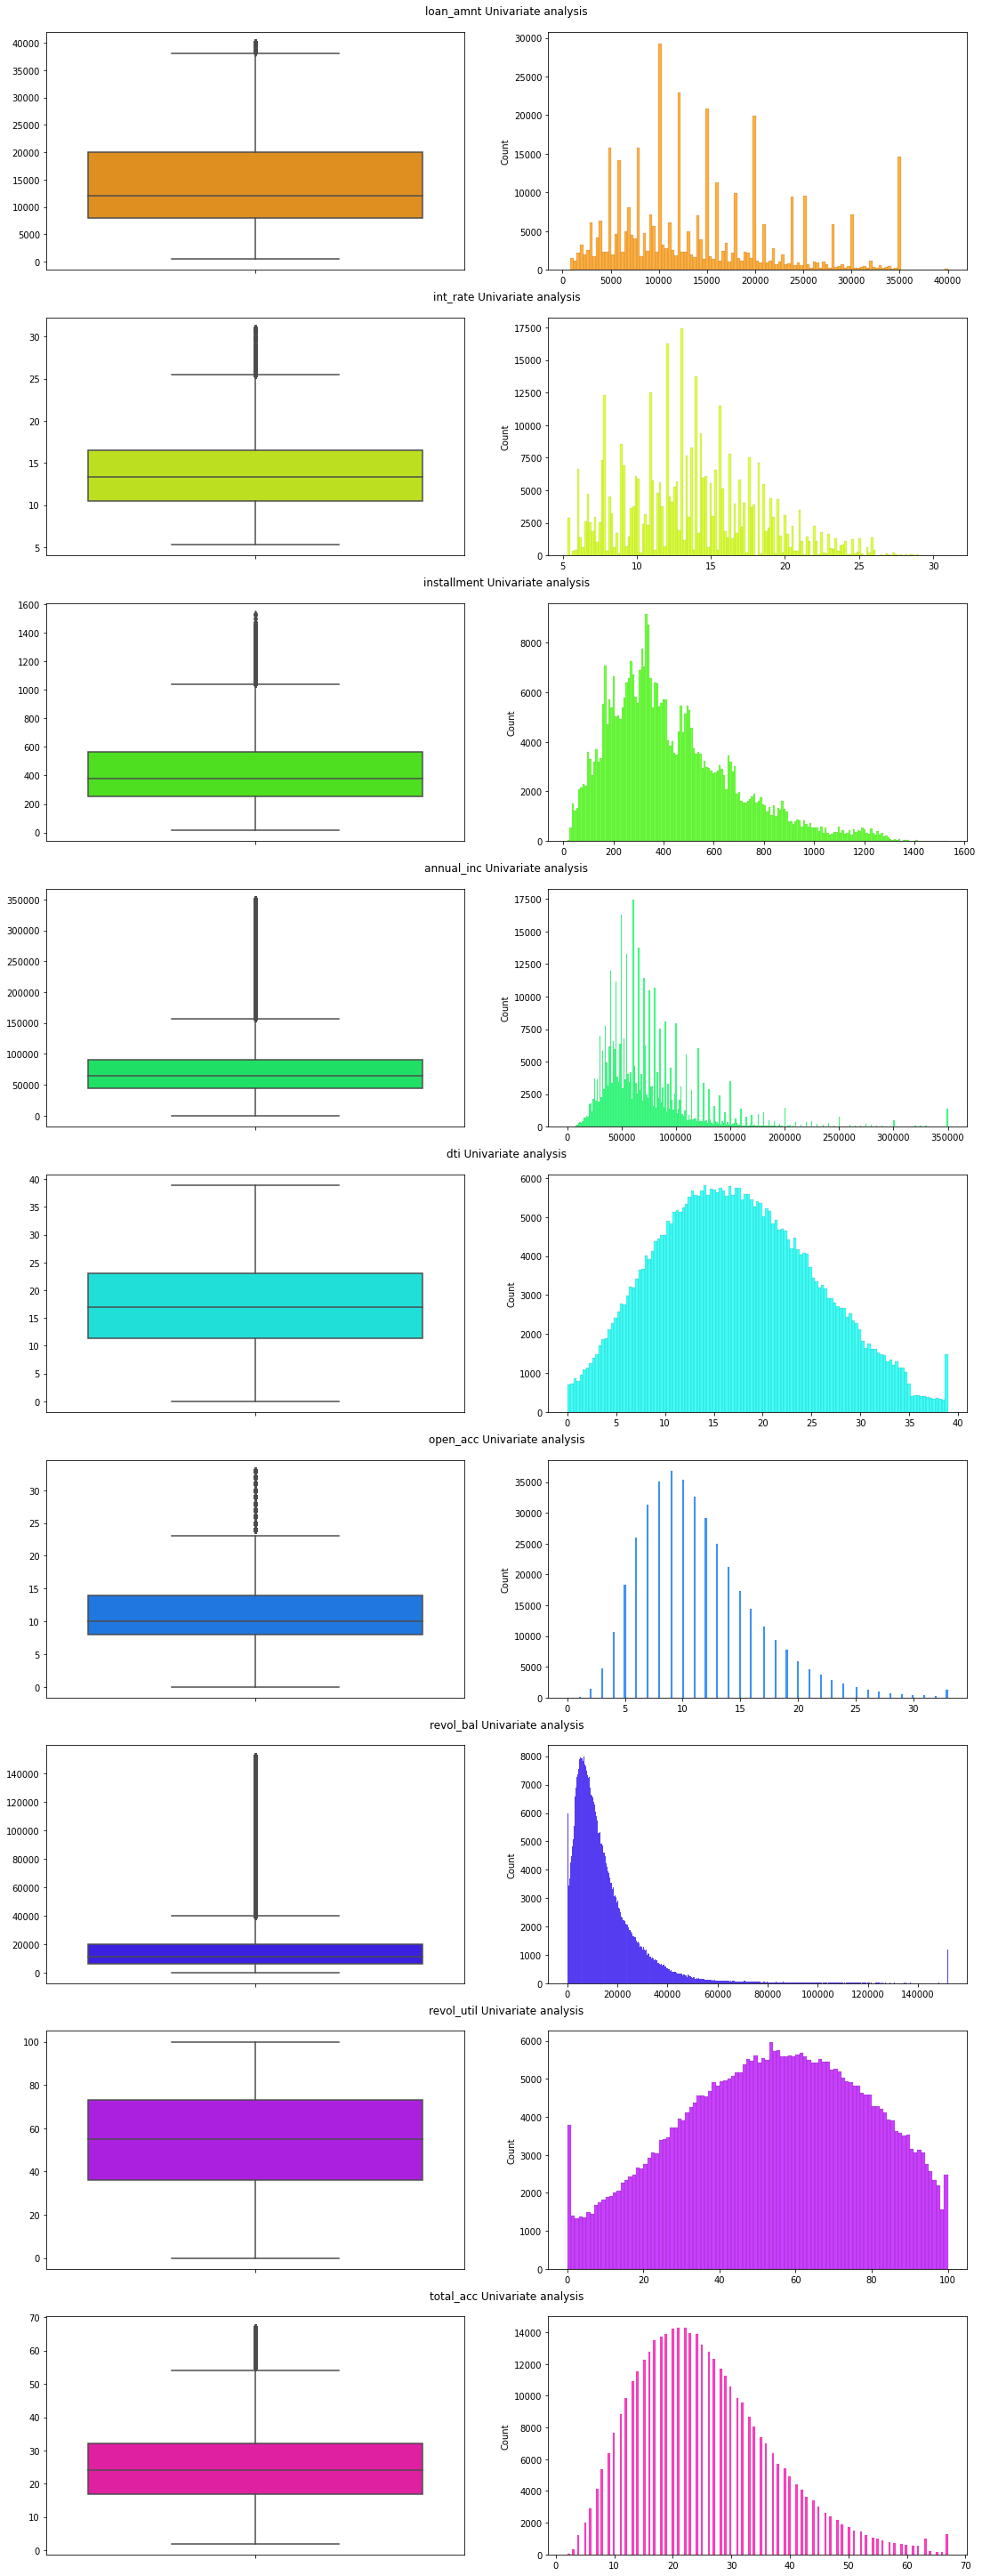

In [315]:
num_features = len(continuos_cols)
fig, axs = plt.subplots(nrows = num_features,  ncols = 2,  figsize= (5, 5 * num_features))

colors = sns.color_palette("hsv", num_features)

for i, (feature, color) in enumerate(zip(continuos_cols, colors)):
    row = i
    sns.boxplot(data=data, y = feature, ax = axs[row][0], color = color).set(ylabel = "")
    sns.histplot(data=data, x = feature, ax = axs[row][1], bins='auto', color = color).set(xlabel = "")
    axs[row][0].set_title(f"{feature} Univariate analysis", x = 1.1, y = 1.05, fontsize = 12)
    
plt.subplots_adjust(top = 1, right = 3)
plt.show()  # Show the plot

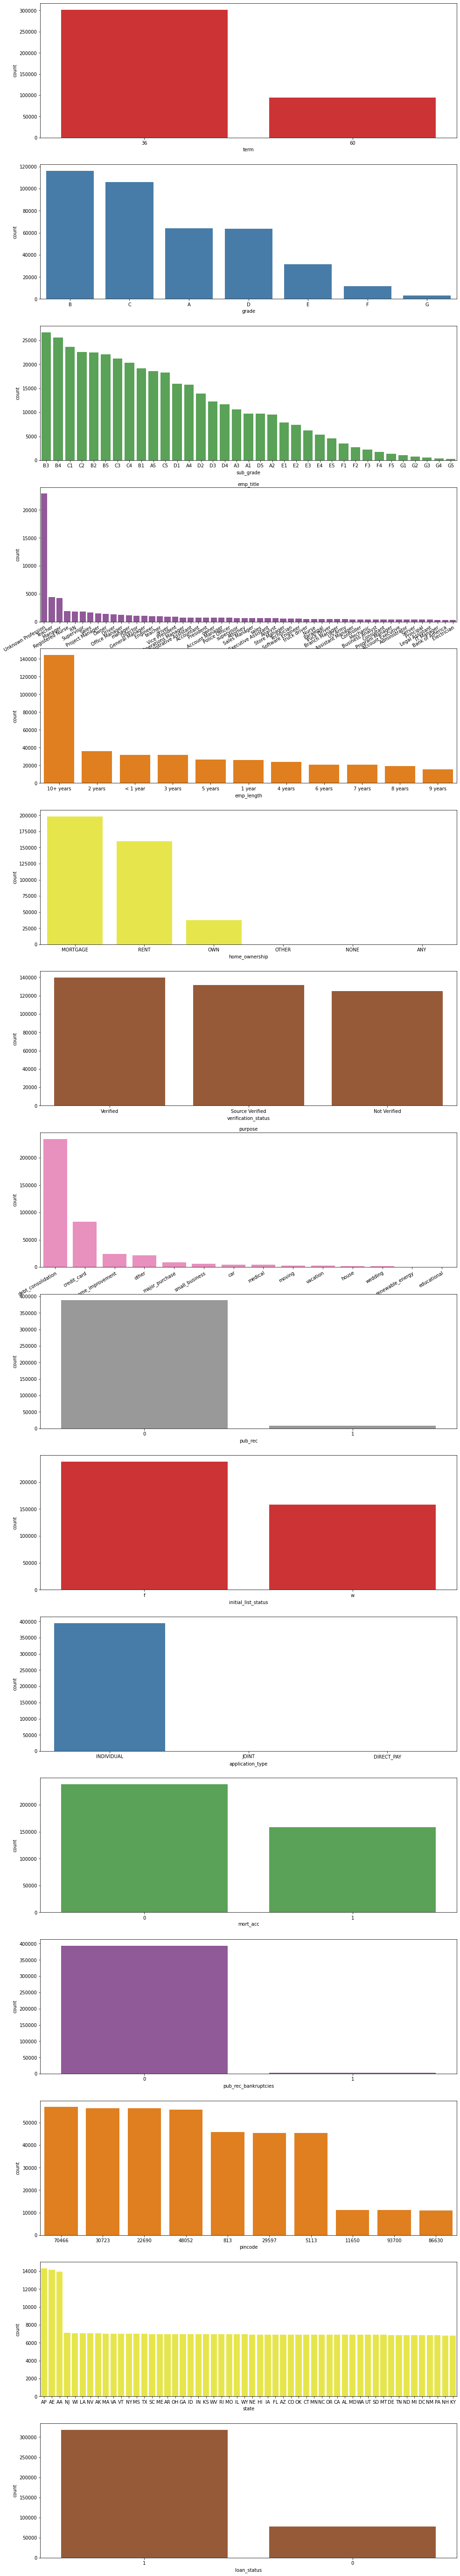

In [316]:
num_features = len(discrete_cols)
fig, axs = plt.subplots(nrows = num_features,  ncols = 1,  figsize= (16, 2 * num_features))

colors = sns.color_palette("Set1", num_features)

for i, (feature, color) in enumerate(zip(discrete_cols, colors)):
    row = i
    sns.countplot(data = data, x = feature, ax = axs[row], color = color, 
                  order = data[feature].value_counts().iloc[:54].index.values)

    if (feature == "emp_title" or feature == "purpose"):
        axs[row].set_xticklabels(axs[row].get_xticklabels(), rotation = 30, ha = "right", rotation_mode="anchor")
        axs[row].xaxis.set_label_position('top')

plt.subplots_adjust(top = 2.5)
plt.show()  # Show the plot

<h3><u>Bi-Variate analysis</u></h3>

**Lower Triangular matrix:** https://seaborn.pydata.org/examples/many_pairwise_correlations.html

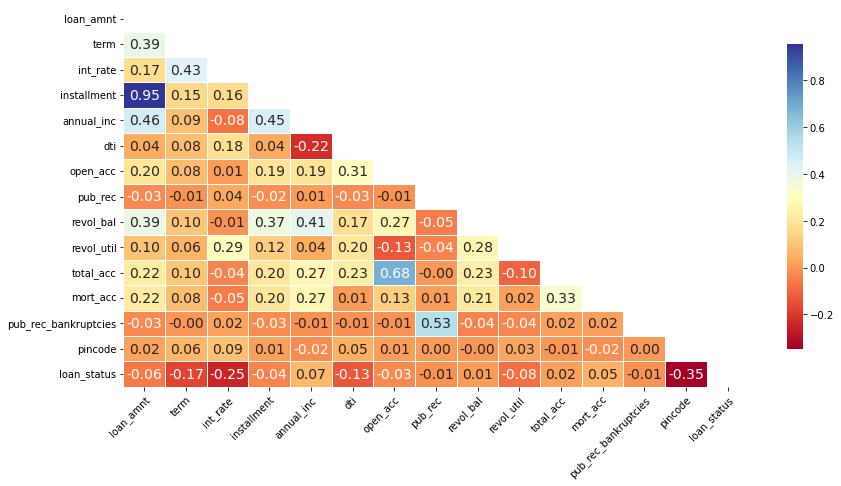

In [317]:
plt.figure(figsize = (14, 7))
mask = np.triu(np.ones_like(data.corr(numeric_only = True), dtype=bool))
sns.heatmap(data = data.corr(numeric_only = True), annot = True, mask = mask, cmap = "RdYlBu", 
            linewidth = 0.5, fmt='.2f', cbar_kws = {"shrink": 0.8}, annot_kws={"size": 14, "rotation":0})
plt.xticks(rotation = 45, ha = "right", rotation_mode="anchor")
plt.show()

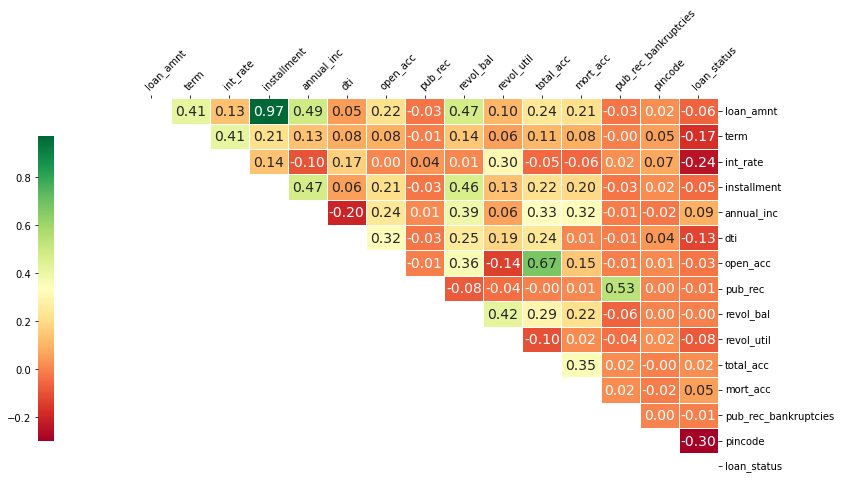

In [318]:
plt.figure(figsize = (14,7))
mask = np.tril(np.ones_like(data.corr(method='spearman', numeric_only = True), dtype=bool))

sns.heatmap(data = data.corr(method='spearman', numeric_only = True), annot = True, mask = mask, cmap = "RdYlGn", 
            linewidth = 0.5, fmt='.2f', cbar_kws = {"shrink": 0.8, "location": "left"}, annot_kws={"size": 14})

plt.tick_params(top=True, bottom = False, right = True, left = False, 
                labeltop=True, labelbottom=False, labelright=True, labelleft=False)
plt.xticks(rotation = 45, ha = "left", rotation_mode="anchor")
plt.yticks(rotation = 0, va = "center", rotation_mode="anchor")
plt.show()

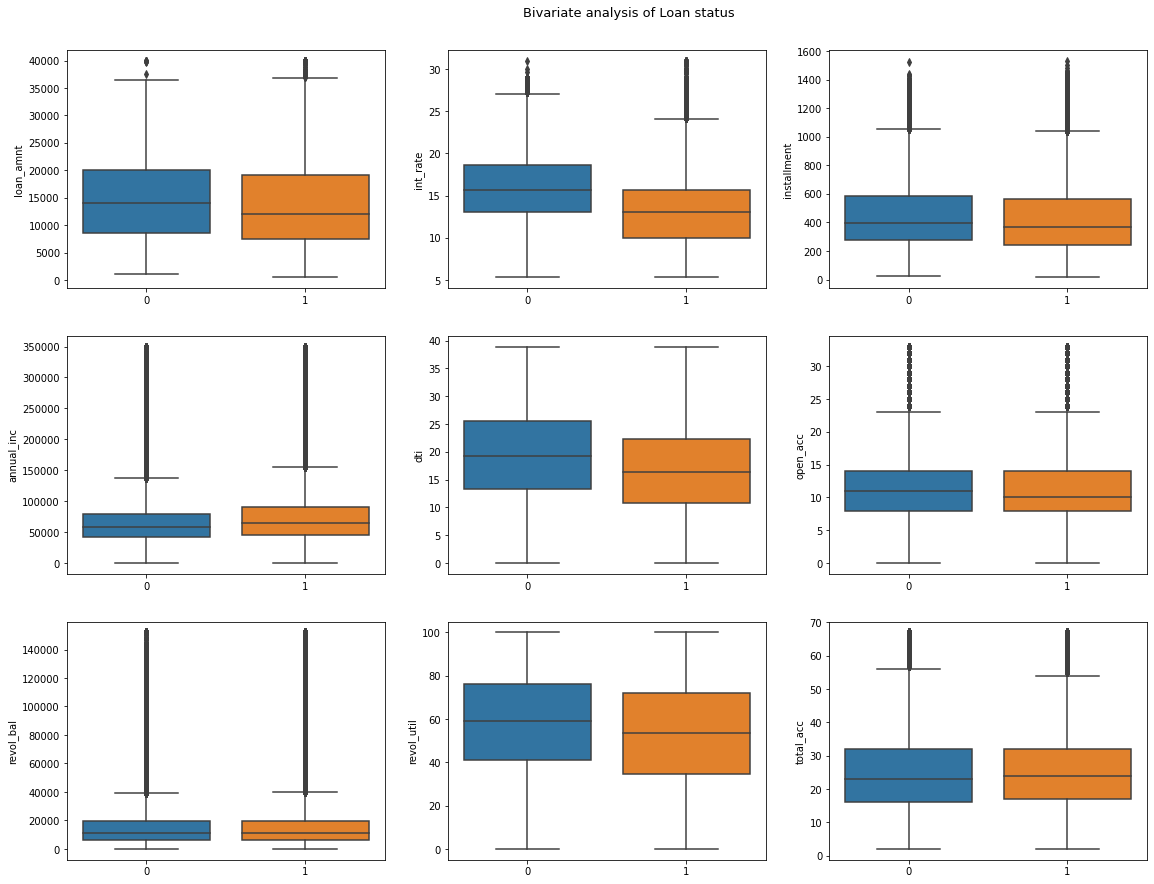

In [319]:
fig, axs = plt.subplots(nrows = 3,  ncols = 3,  figsize=(8, 6))

for i, cont_col in enumerate(continuous_cols):
    row = i // 3
    col = i % 3
    sns.boxplot(data = data, y = cont_col, x = "loan_status", ax = axs[row][col]).set(xlabel = None)

fig.suptitle("Bivariate analysis of Loan status", x = 1.1, y = 2.1, fontsize = 13)
plt.subplots_adjust(right = 2, top = 2)
plt.show()

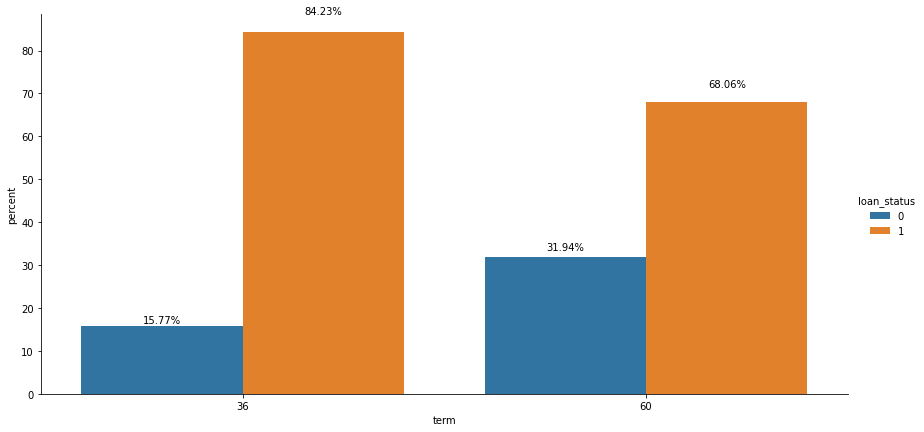

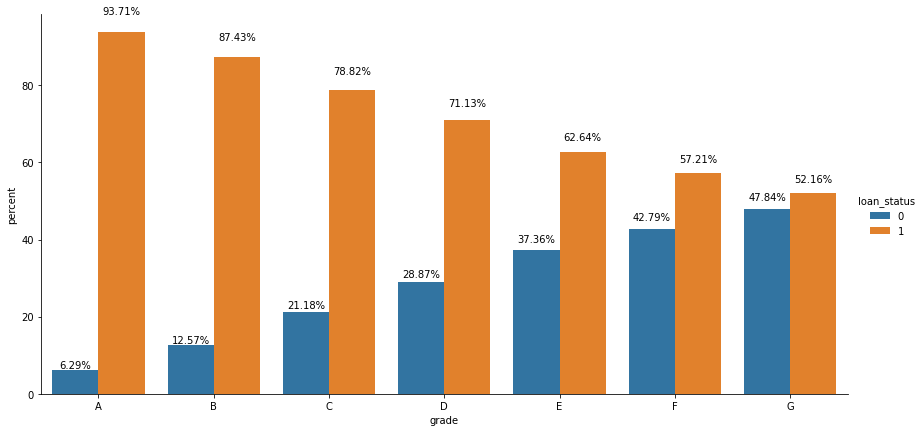

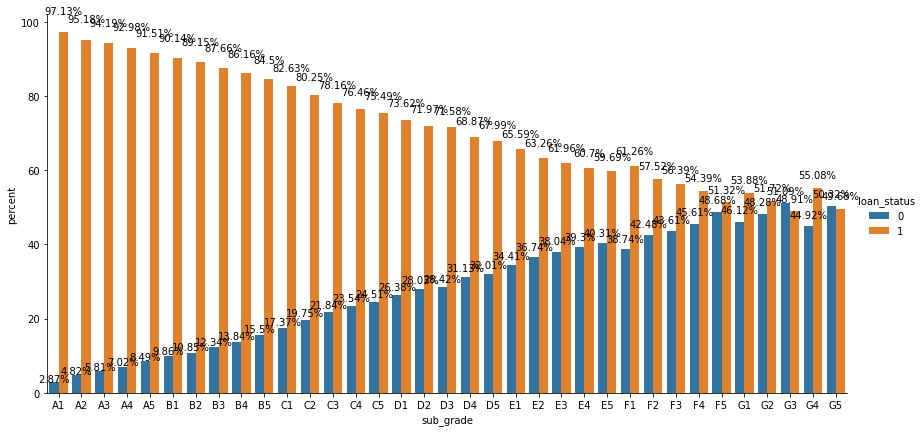

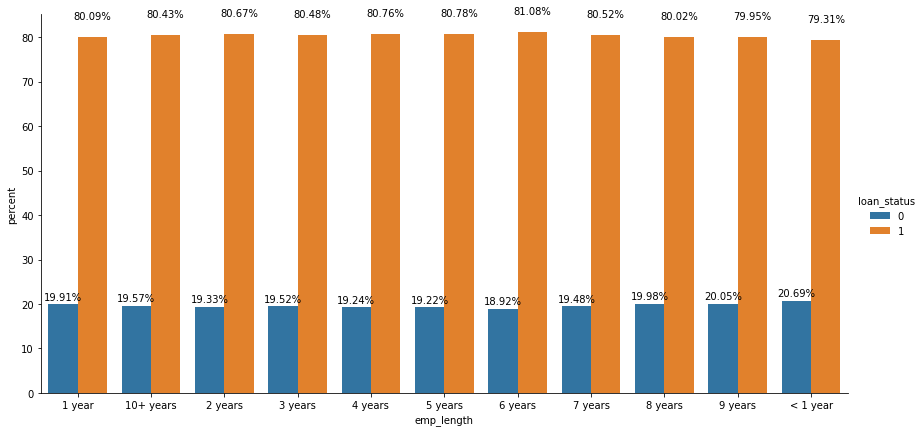

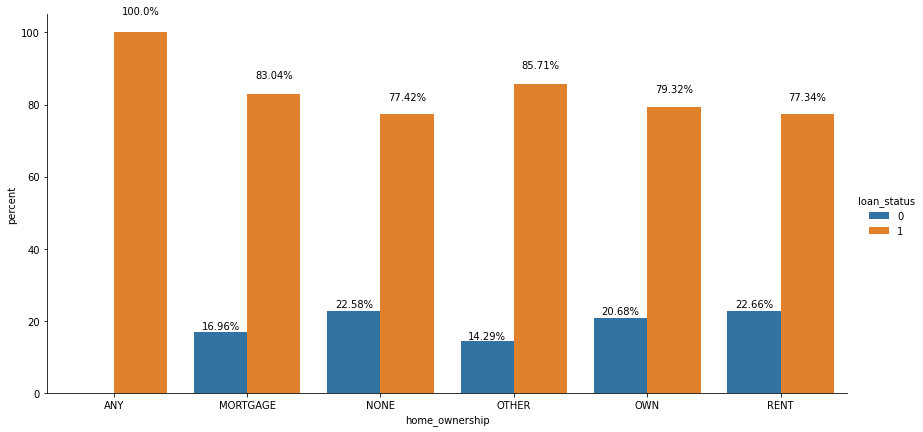

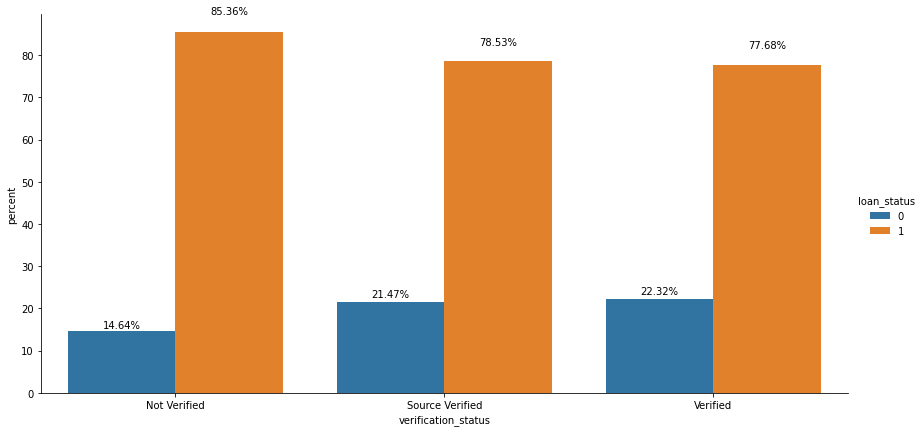

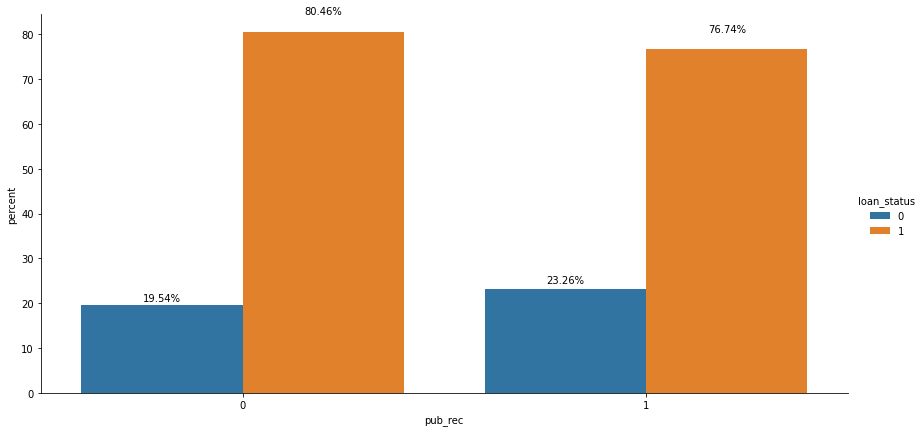

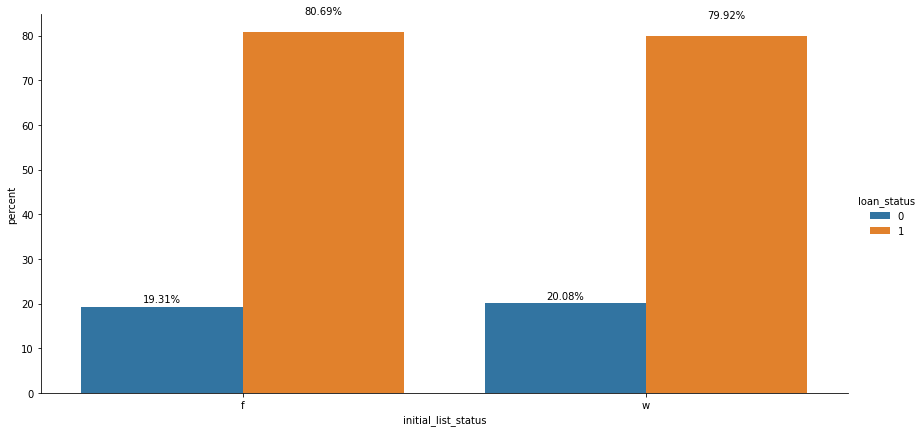

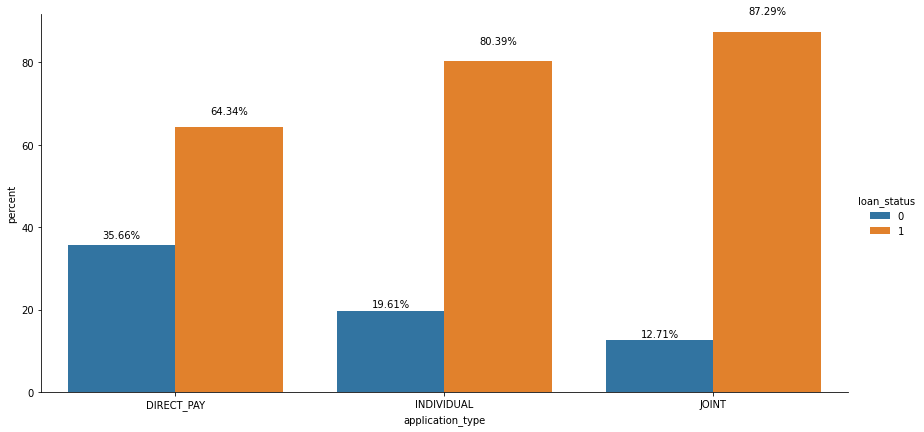

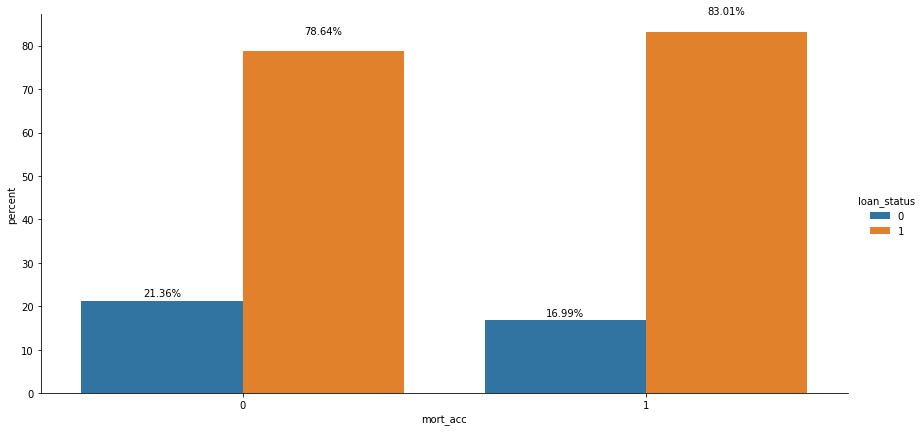

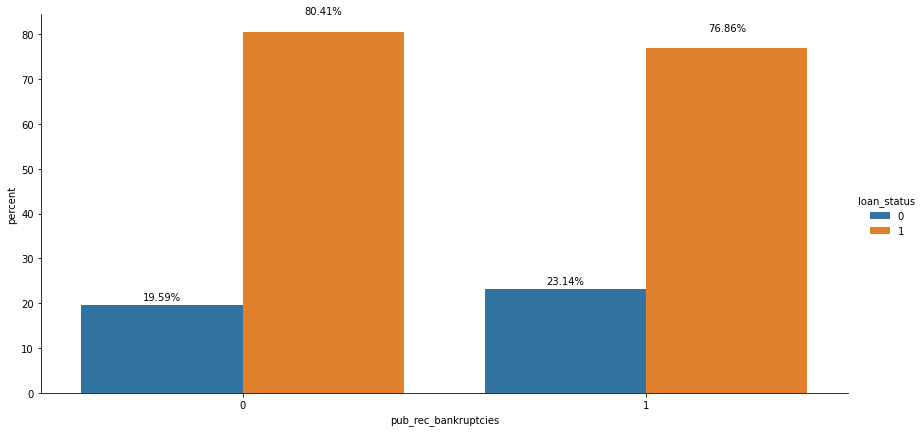

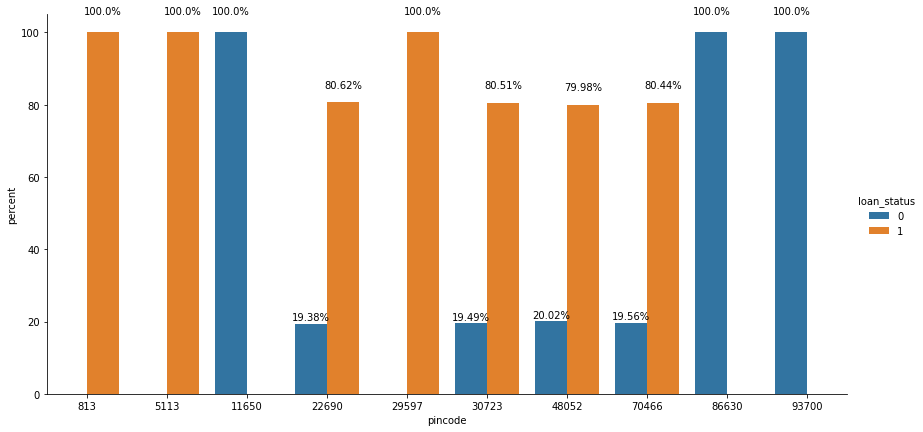

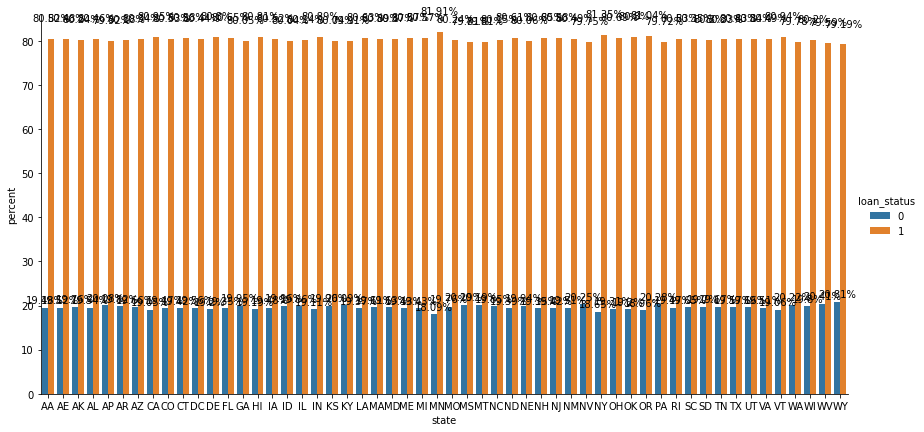

In [320]:
discrete_cols_2 = [col for col in discrete_cols if col not in ["loan_status","emp_title", "purpose"]]

for i, disc_col in enumerate(discrete_cols_2):
    temp_df = data.groupby(disc_col)["loan_status"].value_counts(normalize=True)*100
    temp_df = temp_df.rename('percent').reset_index()
    plot = sns.catplot(data = temp_df, x=disc_col, y="percent", hue="loan_status", kind='bar', height=6, aspect = 2)
    
    for p in plot.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        x = p.get_x() + (p.get_width()/2)
        y = p.get_height() + (0.05 * p.get_height())
        plt.annotate(txt, (x, y), ha='center')
    
plt.show()

<h3><u> Observations</u></h3>
<ol>
    <li> Loan amount and installment features have extremely high correlation. This implies that one variable explains the other and thereofore this is a certain case of <b>Multicollinearity</b></li>
    <li> The features loan_amount, term, annual_income, installment etc are correlated as high income people would take higher loans leading to higher duration of repayment and higher installment values</li>
    <li> Among the numerical variables, interest rate and pincode have a high correlation with our target variable.</li>
    <li> Features like <b>"emp_title", "purpose"</b> have to be binned based on business intelligence. There are too many columns to directly infer their effect on target and if we encode them it will cause curse of dimentionality, <b>hence we will drop them</b></li>
    <li> It's clear from the bivariate <b>boxplot</b> analysis that: <ul>
        <li> Lower interest rate loans have a higher chance of repayment</li>
        <li> Lower dti ratio have a higher chance of repayment</li>
        <li> Lower revol_util has a higher chance of repayment</li>
    </ul></li>
    <br><li> We can infer from the bivariate <b>countplots</b> that: <ul>
        <li> Lower term loans have a higher chance of repayment</li>
        <li> <b>Grade and sub_grade are extremely important features determining the repayment chances. Higher grade individuals have a great track record or loan repayment</b>. We will encode these values ordinally</li>
        <li> Verified loans have higher repayment chance than unverified loans</li>
        <li> It seems that application type has high correlation with repayment however <b>we must remember that the data for this feature is extremely skewed</b></li>
        <li> As we saw earlier, geographical location seems to affect loan repayment quite a lot</li>
    </ul></li>
    <br><li> <b>Sub-grade is a more grannular version of grade so we can keep one and drop the other</b></li>
</ol>

<h3><center><u>Model Building</u></center></h3>

<h3><u> Encoding</u></h3>

In [321]:
df = data.copy()
df = df.drop(columns = ["emp_title", "purpose", "state", "grade"])
df.shape

(396030, 21)

In [334]:
dummy_columns = ['emp_length','home_ownership','initial_list_status','application_type','pincode']
ord_columns = ['sub_grade','verification_status']

encoded_data = pd.get_dummies(df, columns=dummy_columns, drop_first = True) #Dropping first column to avoid dummy var trap

sorted_grades = sorted(df.sub_grade.value_counts().index.values)
encoding_dict = {}
for i in range(0, len(sorted_grades)):
    encoding_dict[sorted_grades[i]] = len(sorted_grades)-i   
encoded_data['sub_grade'] = encoded_data['sub_grade'].map(encoding_dict)

encoding_dict_2 = {"Verified":2, "Source Verified":1, "Not Verified":0}
encoded_data['verification_status'] = encoded_data['verification_status'].map(encoding_dict_2)

#re-ordering columns again
encoded_data.insert(len(encoded_data.columns) - 1, 'loan_status', encoded_data.pop('loan_status'))
encoded_data.head()

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,verification_status,dti,open_acc,pub_rec,...,pincode_5113,pincode_11650,pincode_22690,pincode_29597,pincode_30723,pincode_48052,pincode_70466,pincode_86630,pincode_93700,loan_status
0,10000.0,36,11.44,329.48,27,117000.0,0,26.24,16.0,0,...,0,0,1,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,26,65000.0,0,22.05,17.0,0,...,1,0,0,0,0,0,0,0,0,1
2,15600.0,36,10.49,506.97,28,43057.0,1,12.79,13.0,0,...,1,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,34,54000.0,0,2.60,6.0,0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,21,55000.0,2,33.95,13.0,0,...,0,1,0,0,0,0,0,0,0,0


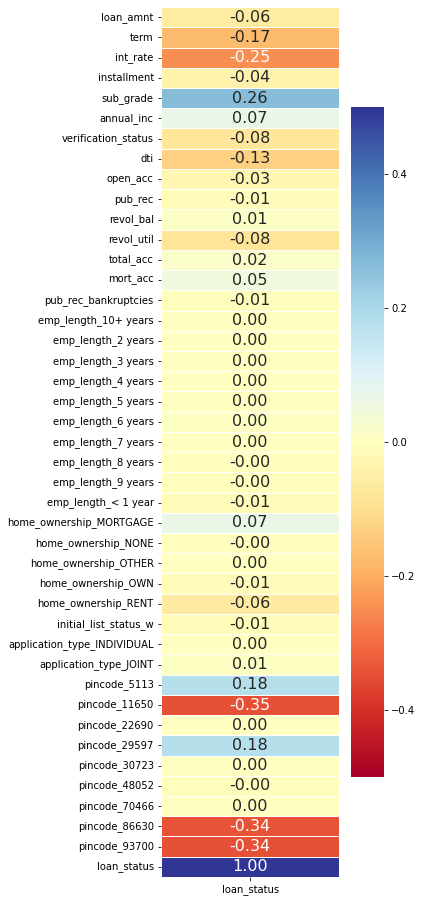

In [335]:
plt.figure(figsize = (4, 16))

# Converting to dataframe as corr doesn't support series data
sns.heatmap(data = encoded_data.corr()[['loan_status']], annot = True, cmap = "RdYlBu", vmax = 0.5, vmin = -0.5,
            linewidth = 0.5, fmt='.2f', cbar = True, annot_kws={"size": 16, "rotation":0})

plt.show()

<h3><u> Pre-Processing</u></h3>

In [344]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = encoded_data.iloc[:, :-1]
y = encoded_data.iloc[:, -1]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 9, shuffle = True)
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

scaler = StandardScaler() #Standard Scaler is preffered as it's robust against outliers, and we have a lot of outliers
xTrain_Scaled = scaler.fit_transform(xTrain)
xTrain_Scaled_df = pd.DataFrame(data = scaler.fit_transform(xTrain), columns = xTrain.columns, index = xTrain.index)
xTest_Scaled = scaler.transform(xTest)
xTest_Scaled_df = pd.DataFrame(data = scaler.transform(xTest), columns = xTest.columns, index = xTest.index)

(297022, 42) (297022,) (99008, 42) (99008,)


In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def dropVIF(df, col_list = None):
    thresh = 10 #V.I.F of > 10 will be dropped
    temp_df = add_constant(df) #statsmodel requires constant column seperately
    if col_list is None:
        col_list = df.columns.tolist()
    elif any(elem not in df.columns.tolist() for elem in col_list):
        return "One or more element passed in column list aren't present in given dataframe"

    col_list.insert(0, "const")
    temp_df = temp_df[col_list]
    flag = 1
    
    while(flag == 1): # While any column has V.I.F > 10
        flag = 0 #reset flag
        vif_max = 1 #lowest possible VIF score
        col_to_drop = None
        
        for i in range(len(temp_df.columns)): # Calculating V.I.F for each column
            vif = variance_inflation_factor(temp_df, i)
            vif = np.round(vif, 0)
            if(vif > thresh and vif > vif_max):
                col_to_drop = temp_df.columns[i]
                vif_max = vif
        
        print(f"Dropped column {col_to_drop} with V.I.F = {vif_max}")  
        #temp_df.drop(columns = df.columns[vif_loc], inplace = True)


def getVIF(df):
    temp_df = add_constant(df) #statsmodel requires constant column seperately
    return pd.DataFrame(data = [variance_inflation_factor(temp_df, i) for i in range(0, temp_df.shape[1])], 
            index = temp_df.columns.tolist(), 
            columns = ["VIF"])    

In [356]:
VIF_df = getVIF(xTrain_Scaled_df)
VIF_df

,VIF
const,1.000000
loan_amnt,58.698951
term,6.646840
int_rate,21.713933
installment,50.900002
sub_grade,21.454373
annual_inc,1.713175
verification_status,1.174336
dti,1.420700
open_acc,2.137311


In [358]:
dropVIF(xTrain_Scaled_df) #encoded_data.columns[0:15].tolist()

Dropped column home_ownership_MORTGAGE with V.I.F = 24757.0


In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(penalty='l2', max_iter = 1000)
lr.fit(xTrain_Scaled, yTrain)
yPred = lr.predict(xTest_Scaled)
report = classification_report(yTest, yPred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     19575
           1       0.88      0.99      0.93     79433

    accuracy                           0.89     99008
   macro avg       0.90      0.73      0.78     99008
weighted avg       0.89      0.89      0.87     99008



In [388]:
feature_imp = pd.DataFrame(data = np.round(np.insert(lr.coef_, 0, lr.intercept_), 2), 
            index = ["Constant"] + xTrain_Scaled_df.columns.tolist(), 
            columns = ["Co-efficients"])
feature_imp["Sorted"] = feature_imp["Co-efficients"].abs()
feature_imp.sort_values(by = "Sorted", axis = 0, ascending=False)

,Co-efficients,Sorted
Constant,3.87,3.87
pincode_11650,-3.09,3.09
pincode_93700,-3.07,3.07
pincode_86630,-3.04,3.04
pincode_70466,-2.64,2.64
pincode_48052,-2.63,2.63
pincode_22690,-2.62,2.62
pincode_30723,-2.62,2.62
pincode_5113,0.87,0.87
pincode_29597,0.87,0.87


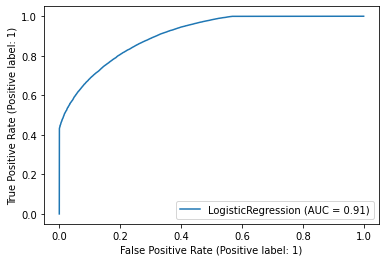

In [389]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, xTest_Scaled, yTest, pos_label = 1)
plt.show()

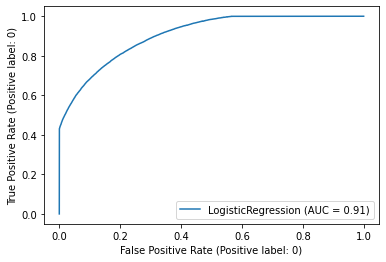

In [390]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, xTest_Scaled, yTest, pos_label = 0)
plt.show()

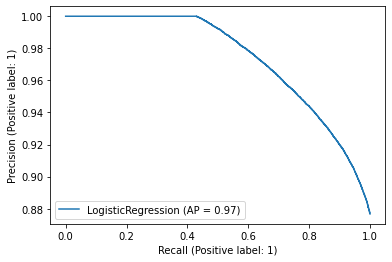

In [392]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(lr, xTest_Scaled, yTest, pos_label = 1)
plt.show()

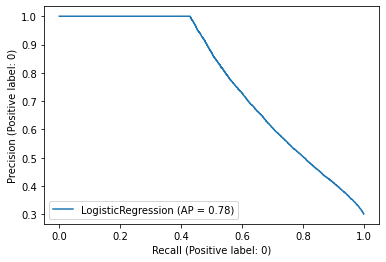

In [391]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(lr, xTest_Scaled, yTest, pos_label = 0)
plt.show()

<h3><u> Comments on Results</u></h3>
<ol>
    <li> Our data had some variables with extremely high multicollinearity, so reduce it, I have used l2 regularization which will deal with the multicollinearity by constricting the coefficient and by keeping all the variables</li>
    <li> The most important features in our predictions were <b>pincode and sub_grade</b>. I had noticed this clearly when we performed bi-variate feature analysis</li>
    <li> We can see that while the overall accuracy our our model is good, there exists a clear imbalance in the results achieved for repayed loans and defaulted loans with the former having better results overall (high F1 score). This means our model is <b>not performing well in detecting the defaulters (class "0"</b>. This phenonmenon might have multiple reasons but as we had already seen that the classes in our data were <b> heavily imbalanced</b>, this makes the model focus more on a specific class. To solve this, <b>techniques like undersampling, oversampling and SMOTE can be used</b></li>
    <li> We can see through our classification metrics that specifically, the <b>Recall of target variable is quite bad </b>for The recall is 0.48, which means that the model is able to identify 48% of the individuals who actually defaulted on their loans. Whereas, since the precision is 0.92, which means that when the model predicts an individual to default on their loan, it is correct 92% of the time. Hence, our <b>False Negatives for class '0' are quite high, so our model is predicting more people as defaulters than they actually are</b></li>
    <li> The AUC of 0.91 suggests that the model has a <b>high level of discrimination power</b> in correctly ranking the probabilities of both defaulting individuals (class 0) and individuals who paid their loans back on time (class 1). It indicates that the model is generally effective in distinguishing between the two classes.</li>
</ol>

<b><u> Tradeoff Questions</u></b>
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it?
<br> <b>As I have explained we can use undersampling and oversampling techniques for the same. We can also play with the threshold values to get the best threshold using which helps us reduce FN</b>
2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. 
<br> <b>This is true, our model is also giving high precision for defaulters which means it's doing well to save LoanTap money by forewarning the lender before default</b>

<h3><center><u>Miscellaneous : Ignore</u></center></h3>

Questionnaire (Answers should present in the text editor along with insights):

1. What percentage of customers have fully paid their Loan Amount?
2. Comment about the correlation between Loan Amount and Installment features.
3. The majority of people have home ownership as _______.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
5. Name the top 2 afforded job titles.
6. Thinking from a bank's perspective, which metric should our primary focus be on..
7. ROC AUC
8. Precision
9. Recall
10. F1 Score
11. How does the gap in precision and recall affect the bank?
12. Which were the features that heavily affected the outcome?
13. Will the results be affected by geographical location? (Yes/No)

1. should we add_constant while checking V.I.F, if constant is high then what to do?
<br>https://stackoverflow.com/questions/59694427/what-does-the-high-vif-for-the-constant-term-intercept-indicate
<br>https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi

2. PCA + Decision boundary

In [ ]:
locs = [df.columns.get_loc(c) for c in col_list if c in df]

In [345]:
temp_df = add_constant(encoded_data)
pd.DataFrame(data = [variance_inflation_factor(temp_df, i) for i in range(0, temp_df.shape[1])], 
            index = temp_df.columns.tolist(), 
            columns = ["VIF"])     

,VIF
const,134564.130215
loan_amnt,59.166840
term,6.683239
int_rate,21.833780
installment,51.296394
sub_grade,21.641137
annual_inc,1.715397
verification_status,1.174971
dti,1.424990
open_acc,2.140934


In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.DataFrame(data = [variance_inflation_factor(encoded_data, i) for i in range(0, encoded_data.shape[1])], 
            index = encoded_data.columns.tolist(), 
            columns = ["VIF"])       

,VIF
loan_amnt,227.841468
term,118.036616
int_rate,223.367307
installment,203.417954
sub_grade,303.407590
annual_inc,6.643866
verification_status,3.067987
dti,7.942459
open_acc,12.769271
pub_rec,1.442525


In [ ]:
# Binning & converting employment length column to integer
# data['emp_length'] = data['emp_length'].apply(lambda yrs: "0 years" if yrs == "< 1 year" else ("10 years" if yrs == '10+ years' else yrs))
# data['emp_length'] = data['emp_length'].str.split(" ").str[0].astype('float64')
# data['emp_length'] = data['emp_length'].apply(lambda yrs: 0 if yrs < 10 else 1)

In [ ]:
# Ordinal encoding verification_status :
# 'Verified' --> verified by LoanTap, 'Source verified' --> income source was verified